<a href="https://colab.research.google.com/github/Anis981/R_with_python/blob/master/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Install needed Dependencies

In [14]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!bash Miniconda3-latest-Linux-x86_64.sh -b -p $HOME/miniconda

--2021-04-26 17:08:08--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94235922 (90M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh.3’

Miniconda3-latest-L 100%[===================>]  89.87M   130MB/s    in 0.7s    

2021-04-26 17:08:09 (130 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh.3’ saved [94235922/94235922]

ERROR: File or directory already exists: '/root/miniconda'
If you want to update an existing installation, use the -u option.


# Load Covid-19 Data

Read the Covid-19 file covid_us_county.csv

In [16]:
covid_file = '/content/drive/MyDrive/anis_data/covid_us_county.csv'
df = pd.read_csv(covid_file)

FileNotFoundError: ignored

In [10]:
import pandas as pd

In [ ]:
df.head()

,fips,county,state,lat,long,date,cases,state_code,deaths
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0


In [ ]:
df_al = df[df['state']=='Alabama']
df_al.head()

,fips,county,state,lat,long,date,cases,state_code,deaths
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0


In [ ]:
df_al_county_cases = df_al.groupby('county')['cases'].sum()

In [ ]:
df_al_county_deaths = df_al.groupby('county')['deaths'].sum()

In [ ]:
def quarter_start(year: int, q: int) -> datetime:
    if not 1 <= q <= 4:
        raise ValueError("Quarter must be within [1, 2, 3, 4]")

    month = [1, 4, 7, 10]
    return datetime(year, month[q - 1], 1)


def get_tile_url(service_type: str, year: int, q: int) -> str:
    dt = quarter_start(year, q)

    base_url = "https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance"
    url = f"{base_url}/type%3D{service_type}/year%3D{dt:%Y}/quarter%3D{q}/{dt:%Y-%m-%d}_performance_mobile_tiles.zip"
    return url

https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance/type=mobile/year=2020/quarter/{dt:%Y-%m-%d}_performance_mobile_tiles.zip

In [ ]:
tile_url = get_tile_url("mobile", 2020, 2)
tile_url

'https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance/type%3Dmobile/year%3D2020/quarter%3D2/2020-04-01_performance_mobile_tiles.zip'

In [ ]:
!wget https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance/type%3Dmobile/year%3D2020/quarter%3D2/2020-04-01_performance_mobile_tiles.zip


--2021-04-01 17:00:44--  https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance/type%3Dmobile/year%3D2020/quarter%3D2/2020-04-01_performance_mobile_tiles.zip
Resolving ookla-open-data.s3-us-west-2.amazonaws.com (ookla-open-data.s3-us-west-2.amazonaws.com)... 52.218.228.217
Connecting to ookla-open-data.s3-us-west-2.amazonaws.com (ookla-open-data.s3-us-west-2.amazonaws.com)|52.218.228.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 249188270 (238M) [application/zip]
Saving to: ‘2020-04-01_performance_mobile_tiles.zip’

2020-04-01_performa 100%[===================>] 237.64M  30.6MB/s    in 7.8s    

2021-04-01 17:00:52 (30.5 MB/s) - ‘2020-04-01_performance_mobile_tiles.zip’ saved [249188270/249188270]



In [ ]:
tiles_file = '/content/drive/MyDrive/anis_data/2020-04-01_performance_mobile_tiles'
tiles = gp.read_file(tiles_file)

In [ ]:
tiles.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
0,1203022122320032,28772,3165,34,8,1,"POLYGON ((24.09302 49.88402, 24.09851 49.88402..."
1,0313113213321131,20782,10180,54,2,2,"POLYGON ((-1.49963 52.95526, -1.49414 52.95526..."
2,1221210331312333,22690,22416,449,6,2,"POLYGON ((30.88806 29.92161, 30.89355 29.92161..."
3,1200312211223323,54493,4635,21,2,2,"POLYGON ((18.00110 59.35840, 18.00659 59.35840..."
4,0302233220203221,90669,6576,21,1,1,"POLYGON ((-81.51306 41.31908, -81.50757 41.319..."


In [ ]:

# zipfile of U.S. county boundaries
county_url = "https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip" 
counties = gp.read_file(county_url)


In [3]:

# filter out the Kentucky fips code and reproject to match the tiles
al_counties = counties.loc[counties['STATEFP'] == '01'].to_crs(4326)
al_counties.head()

NameError: ignored

In [ ]:
df_al_county_cases

county
Autauga        760070
Baldwin       2363042
Barbour        307783
Bibb           305772
Blount         745033
               ...   
Unassigned          0
Walker         926658
Washington     220246
Wilcox         187538
Winston        327111
Name: cases, Length: 69, dtype: int64

In [ ]:
ky_counties

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
12,01,027,00161539,01027,Clay,Clay County,06,H1,G4020,None,None,None,A,1564251834,5285207,+33.2703999,-085.8635254,"POLYGON ((-85.97879 33.32757, -85.97876 33.328..."
32,01,091,00161572,01091,Marengo,Marengo County,06,H1,G4020,None,None,None,A,2530140237,14966620,+32.2475911,-087.7910910,"POLYGON ((-87.92970 32.29252, -87.93180 32.297..."
45,01,049,00161550,01049,DeKalb,DeKalb County,06,H1,G4020,497,22840,None,A,2012676480,4121543,+34.4609290,-085.8039920,"POLYGON ((-85.75212 34.66672, -85.74998 34.669..."
206,01,019,00161535,01019,Cherokee,Cherokee County,06,H1,G4020,None,None,None,A,1433623319,120308342,+34.0695153,-085.6542417,"POLYGON ((-85.78947 34.08630, -85.78959 34.086..."
245,01,065,00161558,01065,Hale,Hale County,06,H1,G4020,None,46220,None,A,1667917734,32412739,+32.7527958,-087.6230608,"POLYGON ((-87.81683 32.83286, -87.81681 32.832..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,01,055,00161553,01055,Etowah,Etowah County,06,H1,G4020,None,23460,None,A,1385871922,35067763,+34.0476407,-086.0342629,"POLYGON ((-86.19772 34.17784, -86.19691 34.178..."
3107,01,021,00161536,01021,Chilton,Chilton County,06,H1,G4020,142,13820,None,A,1794477075,20592142,+32.8540514,-086.7266071,"POLYGON ((-86.87622 32.90193, -86.87622 32.902..."
3113,01,031,00161541,01031,Coffee,Coffee County,06,H1,G4020,None,21460,None,A,1758565919,3907189,+31.4022580,-085.9896022,"POLYGON ((-86.19472 31.52446, -86.19474 31.525..."
3119,01,039,00161545,01039,Covington,Covington County,06,H1,G4020,None,None,None,A,2669134207,34226200,+31.2439873,-086.4487206,"POLYGON ((-86.48595 31.52536, -86.48514 31.525..."


In [ ]:
tiles_in_ky_counties = gp.sjoin(tiles, ky_counties, how="inner", op='intersects')

In [ ]:
tiles_in_ky_counties

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,index_right,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
1549,0320200131023310,10767,22380,71,3,1,"POLYGON ((-87.46216 31.22220, -87.45667 31.222...",795,01,053,00161552,01053,Escambia,Escambia County,06,H1,G4020,426,12120,None,A,2448115116,20504948,+31.1222867,-087.1684097
109260,0320200131221210,100699,1428,41,1,1,"POLYGON ((-87.48413 31.10939, -87.47864 31.109...",795,01,053,00161552,01053,Escambia,Escambia County,06,H1,G4020,426,12120,None,A,2448115116,20504948,+31.1222867,-087.1684097
471799,0320201020233012,35127,18194,75,3,3,"POLYGON ((-87.04468 31.08587, -87.03918 31.085...",795,01,053,00161552,01053,Escambia,Escambia County,06,H1,G4020,426,12120,None,A,2448115116,20504948,+31.1222867,-087.1684097
631344,0320200133001022,80500,12275,50,13,5,"POLYGON ((-87.49512 31.03882, -87.48962 31.038...",795,01,053,00161552,01053,Escambia,Escambia County,06,H1,G4020,426,12120,None,A,2448115116,20504948,+31.1222867,-087.1684097
722663,0320201020233222,682,134,104,1,1,"POLYGON ((-87.05566 31.05764, -87.05017 31.057...",795,01,053,00161552,01053,Escambia,Escambia County,06,H1,G4020,426,12120,None,A,2448115116,20504948,+31.1222867,-087.1684097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771531,0320023202013021,59068,1808,37,3,1,"POLYGON ((-87.05017 32.79651, -87.04468 32.796...",246,01,105,00161579,01105,Perry,Perry County,06,H1,G4020,None,None,None,A,1863900621,10937769,+32.6390053,-087.2938269
2074012,0320022331021213,31500,5775,30,1,1,"POLYGON ((-87.47864 32.44952, -87.47314 32.449...",246,01,105,00161579,01105,Perry,Perry County,06,H1,G4020,None,None,None,A,1863900621,10937769,+32.6390053,-087.2938269
2868213,0320022331023303,24209,5562,31,1,1,"POLYGON ((-87.46765 32.41243, -87.46216 32.412...",246,01,105,00161579,01105,Perry,Perry County,06,H1,G4020,None,None,None,A,1863900621,10937769,+32.6390053,-087.2938269
3085957,0320022313303220,15993,1761,53,2,1,"POLYGON ((-87.31934 32.63012, -87.31384 32.630...",246,01,105,00161579,01105,Perry,Perry County,06,H1,G4020,None,None,None,A,1863900621,10937769,+32.6390053,-087.2938269


In [ ]:
tiles_in_al_mean = tiles_in_ky_counties.groupby('NAME').mean()

tiles_in_al_mean

In [ ]:
tiles_in_al_mean

,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,index_right,ALAND,AWATER
NAME,,,,,,,,
Autauga,31825.655462,7611.151261,50.218487,2.571429,1.344538,1328.0,1.539602e+09,2.570696e+07
Baldwin,33553.939665,8627.226816,54.012291,3.242458,1.544134,1246.0,4.117622e+09,1.132981e+09
Barbour,24882.870370,4925.037037,64.462963,2.518519,1.111111,1827.0,2.292160e+09,5.052321e+07
Bibb,29346.053571,5849.803571,56.160714,2.535714,1.160714,3014.0,1.612167e+09,9.602089e+06
Blount,29977.525000,6300.631250,62.731250,2.731250,1.187500,855.0,1.670104e+09,1.501547e+07
...,...,...,...,...,...,...,...,...
Tuscaloosa,45019.032184,12128.250575,39.356322,2.903448,1.416092,586.0,3.421010e+09,7.871455e+07
Walker,32086.489362,8547.409574,44.228723,2.531915,1.319149,2981.0,2.048686e+09,3.675470e+07
Washington,25156.906250,5785.250000,59.031250,2.250000,1.031250,2111.0,2.797720e+09,2.165273e+07


In [ ]:
df_al_county_cases

county
Autauga        760070
Baldwin       2363042
Barbour        307783
Bibb           305772
Blount         745033
               ...   
Unassigned          0
Walker         926658
Washington     220246
Wilcox         187538
Winston        327111
Name: cases, Length: 69, dtype: int64

In [ ]:
df_combined = df_al_county_cases.to_frame().join(tiles_in_al_mean)

In [ ]:
df_combined

,cases,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,index_right,ALAND,AWATER
county,,,,,,,,,
Autauga,760070,31825.655462,7611.151261,50.218487,2.571429,1.344538,1328.0,1.539602e+09,2.570696e+07
Baldwin,2363042,33553.939665,8627.226816,54.012291,3.242458,1.544134,1246.0,4.117622e+09,1.132981e+09
Barbour,307783,24882.870370,4925.037037,64.462963,2.518519,1.111111,1827.0,2.292160e+09,5.052321e+07
Bibb,305772,29346.053571,5849.803571,56.160714,2.535714,1.160714,3014.0,1.612167e+09,9.602089e+06
Blount,745033,29977.525000,6300.631250,62.731250,2.731250,1.187500,855.0,1.670104e+09,1.501547e+07
...,...,...,...,...,...,...,...,...,...
Unassigned,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Walker,926658,32086.489362,8547.409574,44.228723,2.531915,1.319149,2981.0,2.048686e+09,3.675470e+07
Washington,220246,25156.906250,5785.250000,59.031250,2.250000,1.031250,2111.0,2.797720e+09,2.165273e+07


In [ ]:
df_combined.to_csv('/content/drive/MyDrive/anis_data/combined_data.csv')


Start from Here

In [ ]:
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [ ]:
df_combined = pd.read_csv('/content/drive/MyDrive/anis_data/combined_data.csv')
df_combined.head()
df_cell = pd.read_csv('/content/drive/MyDrive/anis_data/combined_data.csv')

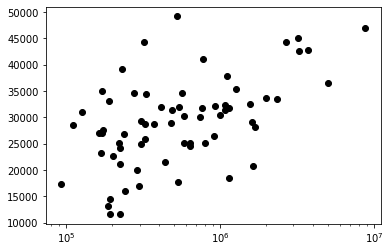

In [ ]:

plt.plot(df_combined['cases'],df_combined['avg_d_kbps'],'o', color='black')
plt.xscale('log') 

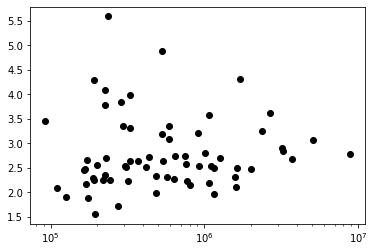

In [ ]:
plt.plot(df_combined['cases'],df_combined['tests'],'o', color='black')
plt.xscale('log') 

In [ ]:
df_combined_deaths = df_al_county_deaths.to_frame().join(tiles_in_al_mean)

NameError: ignored

In [ ]:
df_combined_deaths 

NameError: ignored

In [ ]:
plt.plot(df_combined_deaths['deaths'],df_combined_deaths['avg_d_kbps'],'o', color='black')
plt.xscale('log') 

NameError: ignored

In [ ]:
plt.plot(df_combined_deaths['deaths'],df_combined_deaths['tests'],'o', color='black')
plt.xscale('log') 

NameError: ignored

In [ ]:
import plotly.express as px


In [ ]:
fig = px.scatter(df_combined['cases'],df_combined['tests'])
fig.show()


In [ ]:
#df_cell = pd.read_csv('/content/drive/MyDrive/anis_data/cell_towers_2021-04-01-T000000.csv')

In [ ]:
df_cell_nr = df_cell[df_cell['radio']=='NR']

In [ ]:
df_cell_nr.to_csv('/content/drive/MyDrive/anis_data/nr_cell_data.csv')


In [ ]:
df_cell_nr = pd.read_csv('/content/drive/MyDrive/anis_data/nr_cell_data.csv')

In [ ]:
df_cell_nr

,Unnamed: 0,radio,mcc,net,area,cell,unit,lon,lat,range,samples,changeable,created,updated,averageSignal
0,42286965,NR,234,20,95,2147483647,0,-0.012850,51.491510,7055,11,1,1594295050,1599675545,0
1,42287004,NR,286,1,44301,1431262543,0,35.151617,37.071601,4892,404,1,1594296003,1607428801,0
2,42287005,NR,286,1,43301,3322594826,0,35.254038,37.031612,1067,3,1,1594296005,1600732803,0
3,42287007,NR,286,1,25377,1013398631,0,29.293985,40.655520,1000,4,1,1594296006,1594296007,0
4,42287013,NR,286,1,43301,1670144908,0,35.251332,37.033680,1000,12,1,1594296013,1607126406,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,43444884,NR,262,1,5127,3626162210,0,13.324710,52.537750,1000,1,1,1617105605,1617105605,0
1029,43444885,NR,262,1,5127,410458231,0,13.365260,52.549992,1000,1,1,1617105605,1617105605,0
1030,43446324,NR,310,260,46189,2147483647,0,-77.446828,38.989574,5971,3,1,1617124450,1617196387,0
1031,43447486,NR,262,1,5127,715532966,0,13.358010,52.546871,1000,1,1,1617148803,1617148803,0


In [ ]:
df_cell_nr[ (df_cell_nr['lat'] < 36) & (df_cell_nr['lat'] > 30) ]

,Unnamed: 0,radio,mcc,net,area,cell,unit,lon,lat,range,samples,changeable,created,updated,averageSignal
29,42294764,NR,310,410,8990,2147483647,0,-79.810474,32.879937,1000,4,1,1594424419,1597895134,0
63,42308233,NR,310,410,25510,2147483647,0,-92.140572,34.278580,1000,1,1,1594660561,1594660561,0
84,42317615,NR,310,410,4529,2147483647,0,-83.209821,34.599583,1000,3,1,1594831926,1594831976,0
88,42320672,NR,310,260,30596,2147483647,0,-84.370850,33.559277,1000,1,1,1594903619,1594903619,0
91,42322527,NR,310,260,15998,2147483647,0,-81.491440,30.058195,6501,3,1,1594927184,1605547211,0
92,42325537,NR,310,410,4547,2147483647,0,-83.880835,33.110927,9101,7,1,1594988391,1594988965,0
118,42341055,NR,310,260,34746,2147483647,0,-112.351120,33.508213,1000,1,1,1595209915,1595209915,0
122,42342720,NR,310,410,16932,2147483647,0,-84.698667,35.648034,21402,8,1,1595247178,1603284981,0
123,42343732,NR,310,410,4548,2147483647,0,-82.388069,32.419182,1000,1,1,1595264403,1595264403,0
150,42364472,NR,310,260,26271,2147483647,0,-117.877511,33.875722,4973,5,1,1595636108,1609982130,0


In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [ ]:
df_cell_nr['location'] = df_cell_nr.apply(lambda x: geolocator.reverse("{},{}".format(x.lat,x.lon)), axis=1)

NameError: ignored

In [ ]:
df_cell_nr.head()

,Unnamed: 0,radio,mcc,net,area,cell,unit,lon,lat,range,samples,changeable,created,updated,averageSignal,location
0,42286965,NR,234,20,95,2147483647,0,-0.012850,51.491510,7055,11,1,1594295050,1599675545,0,"(Mudchute Dog Park, East Ferry Road, Cubitt To..."
1,42287004,NR,286,1,44301,1431262543,0,35.151617,37.071601,4892,404,1,1594296003,1607428801,0,"(Kocatepe, Salbaş, Çukurova, Adana, Akdeniz Bö..."
2,42287005,NR,286,1,43301,3322594826,0,35.254038,37.031612,1067,3,1,1594296005,1600732803,0,"(Adana-Erdemlı Otoyolu, Adana, Seyhan, Adana, ..."
3,42287007,NR,286,1,25377,1013398631,0,29.293985,40.655520,1000,4,1,1594296006,1594296007,0,"(İsmet Paşa, İsmet Paşa Mahallesi, Yalova merk..."
4,42287013,NR,286,1,43301,1670144908,0,35.251332,37.033680,1000,12,1,1594296013,1607126406,0,"(Adana-Erdemlı Otoyolu, Yüzüncüyıl, Kireçocağı..."


In [ ]:
location

Location(Getränke Hoffmann, Sophie-Charlotten-Straße, Charlottenburg, Charlottenburg-Wilmersdorf, Berlin, 14059, Deutschland, (52.5225598, 13.2851503, 0.0))